# Using Machine Learning to explain and predict the life expectancy of different countries

#### Data Source:
https://www.kaggle.com/kumarajarshi/life-expectancy-who/data

#### Timeframe of the Data:
2000 - 2015

## Data Preprocessing

In [1]:
# Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
# Importing the dataset
life_data = pd.read_csv("data/Life_expectancy_data.csv", sep=",")
# Dropping the year column as Life expectancy for each country between 1950 - 2015 is analyzed in another model
life_data = life_data.drop('Year', axis = 1)
life_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Dealing with categorical data
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status'], axis = 1)
life_data.head()


,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [14]:
life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


## Exploratory Data Analysis

In [15]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

Text(0,0.5,'Life Expectancy')

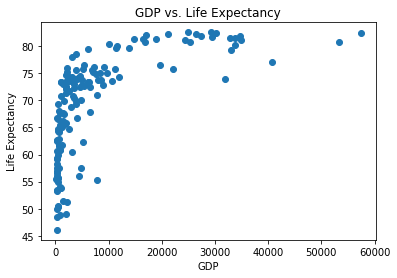

In [23]:
# GDP vs. Life Expectancy
plt.scatter(life_data['GDP'], life_data['Life expectancy '])
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

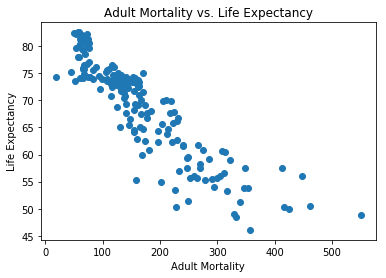

In [24]:
# Adult Mortality vs. Life Expectancy
plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '])
plt.title('Adult Mortality vs. Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

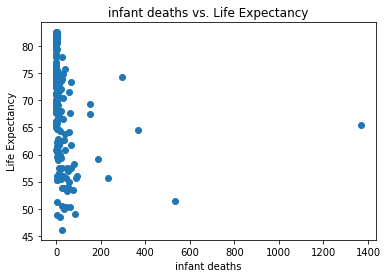

In [25]:
# Infant Deaths vs. Life Expectancy
plt.scatter(life_data['infant deaths'], life_data['Life expectancy '])
plt.title('infant deaths vs. Life Expectancy')
plt.xlabel('infant deaths')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

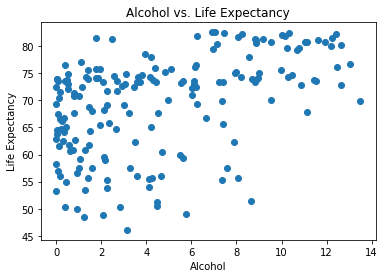

In [26]:
# Alcohol vs. Life Expectancy
plt.scatter(life_data['Alcohol'], life_data['Life expectancy '])
plt.title('Alcohol vs. Life Expectancy')
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

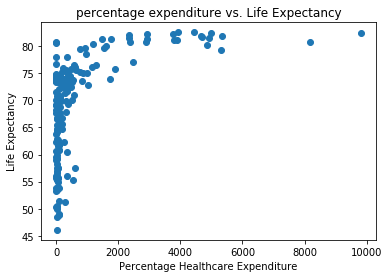

In [27]:
# percentage expenditure vs. Life Expectancy
plt.scatter(life_data['percentage expenditure'], life_data['Life expectancy '])
plt.title('percentage expenditure vs. Life Expectancy')
plt.xlabel('Percentage Healthcare Expenditure')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

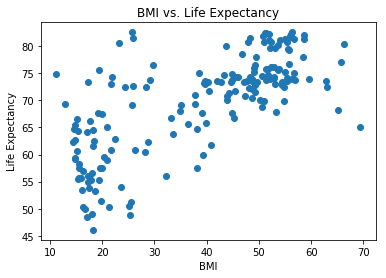

In [28]:
# BMI vs. Life Expectancy
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])
plt.title('BMI vs. Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

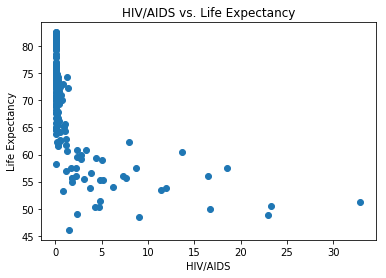

In [33]:
# HIV/AIDS vs. Life Expectancy
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])
plt.title('HIV/AIDS vs. Life Expectancy')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

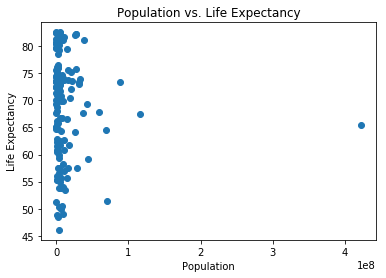

In [29]:
# Population vs. Life Expectancy
plt.scatter(life_data['Population'], life_data['Life expectancy '])
plt.title('Population vs. Life Expectancy')
plt.xlabel('Population')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

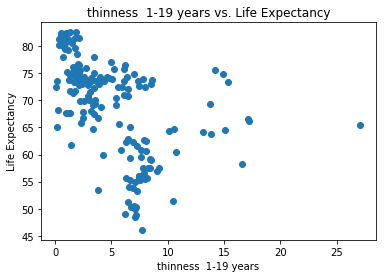

In [30]:
# Population vs. Life Expectancy
plt.scatter(life_data[' thinness  1-19 years'], life_data['Life expectancy '])
plt.title('thinness  1-19 years vs. Life Expectancy')
plt.xlabel('thinness  1-19 years')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

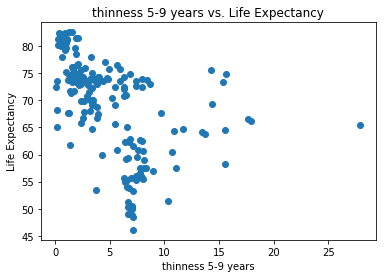

In [31]:
# thinness 5-9 years vs. Life Expectancy
plt.scatter(life_data[' thinness 5-9 years'], life_data['Life expectancy '])
plt.title('thinness 5-9 years vs. Life Expectancy')
plt.xlabel('thinness 5-9 years')
plt.ylabel('Life Expectancy')

Text(0,0.5,'Life Expectancy')

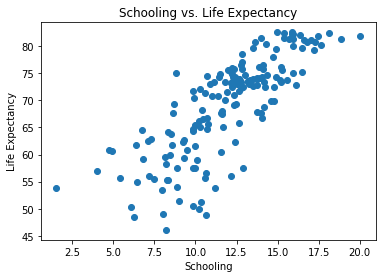

In [32]:
# Schooling vs. Life Expectancy
plt.scatter(life_data['Schooling'], life_data['Life expectancy '])
plt.title('Schooling vs. Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')

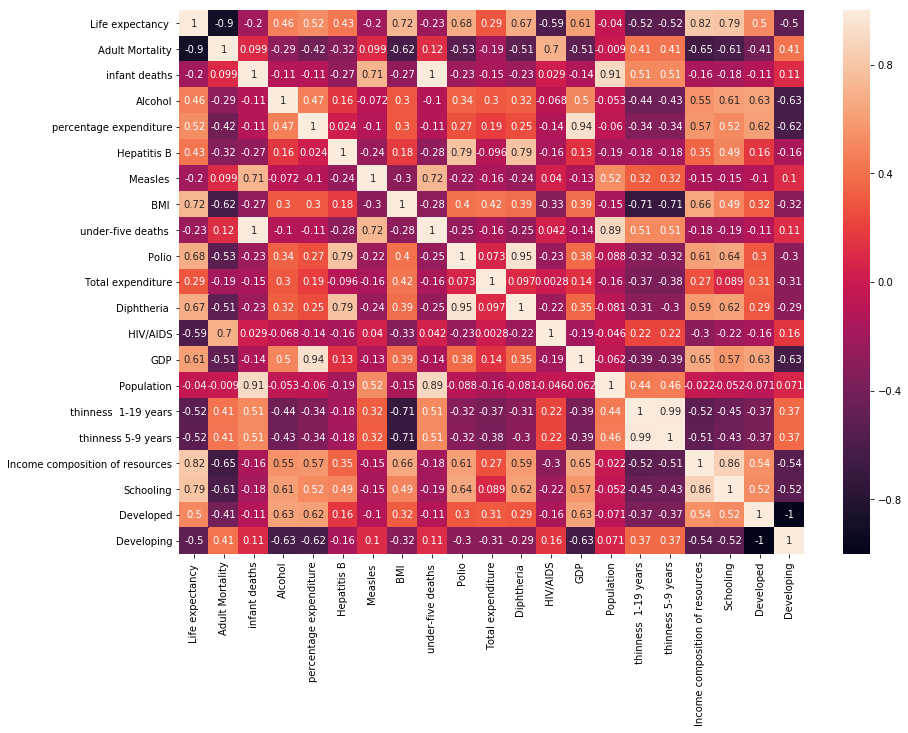

In [34]:
import seaborn as sns
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True)